In [1]:
from os import listdir
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import tensorflow as tf

2023-02-16 16:35:17.284580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Look at data folder structure
classes_dir = listdir("data/Kather_texture_2016_image_tiles_5000")
classes_dir

['02_STROMA',
 '06_MUCOSA',
 '.DS_Store',
 '05_DEBRIS',
 '01_TUMOR',
 '03_COMPLEX',
 '08_EMPTY',
 '04_LYMPHO',
 '07_ADIPOSE']

In [3]:
# Check files
files = listdir("data/Kather_texture_2016_image_tiles_5000/01_TUMOR")
for n in range(5):
    print(files[n])

10B61_CRC-Prim-HE-09_022.tif_Row_301_Col_1.tif
4D50_CRC-Prim-HE-04_034.tif_Row_1_Col_601.tif
12A0_CRC-Prim-HE-07_025.tif_Row_451_Col_1.tif
5F7E_CRC-Prim-HE-04_015.tif_Row_1_Col_151.tif
7BA4_CRC-Prim-HE-07_006.tif_Row_1_Col_151.tif


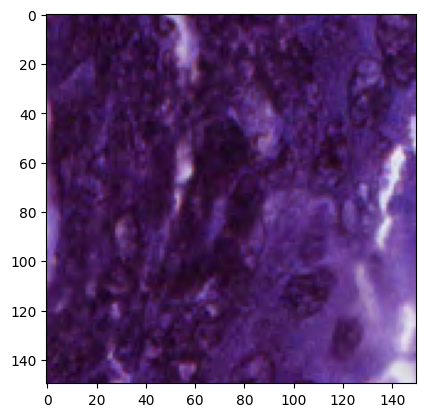

In [4]:
# visualize example image
file = cv2.imread("data/Kather_texture_2016_image_tiles_5000/01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif")
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
# file = cv2.resize(file, (128, 128))
plt.imshow(file)

In [5]:
# Load data
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data/Kather_texture_2016_image_tiles_5000"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = (imagePath.split(os.path.sep)[-2][1])
    # Since we are going to use MobileNetV2 we need to resize the images
    # to the expected size by the pre-trained network.
    image = load_img(imagePath, target_size=(150, 150))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = tf.cast(image, tf.float32) / 255.0 #normalize
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


2023-02-16 16:35:27.295914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
data.shape

(5000, 150, 150, 3)

In [7]:
print(labels[10], labels[2500], labels[4500])

2 3 7


In [8]:
data[0]

array([[[ 1.3840853e-04, -2.7835448e-03, -1.6147634e-03],
        [-1.0765090e-04, -2.7835448e-03, -1.8915801e-03],
        [-1.9992309e-04, -2.8758170e-03, -1.9838526e-03],
        ...,
        [ 1.7070359e-03, -1.2149173e-03, -4.6136098e-05],
        [ 1.2149175e-03, -1.7070357e-03, -5.3825451e-04],
        [ 1.0918879e-03, -1.8608227e-03, -4.7673969e-04]],

       [[ 1.9992334e-04, -2.8143022e-03, -1.7993079e-03],
        [-7.5355626e-04, -3.1833909e-03, -2.0453674e-03],
        [-6.9204147e-04, -3.1218762e-03, -1.9838526e-03],
        ...,
        [ 1.3071897e-03, -1.5224912e-03, -3.2295269e-04],
        [ 1.7070359e-03, -1.1226451e-03,  7.6893732e-05],
        [ 1.5224915e-03, -1.3379469e-03,  1.5378933e-05]],

       [[ 5.3825474e-04, -2.5682431e-03, -1.7070357e-03],
        [-5.3825451e-04, -2.8450596e-03, -1.5840060e-03],
        [-6.9204147e-04, -2.9988466e-03, -1.7377931e-03],
        ...,
        [ 9.9961576e-04, -1.7685505e-03, -6.6128408e-04],
        [ 1.5224915e-03, -1.2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


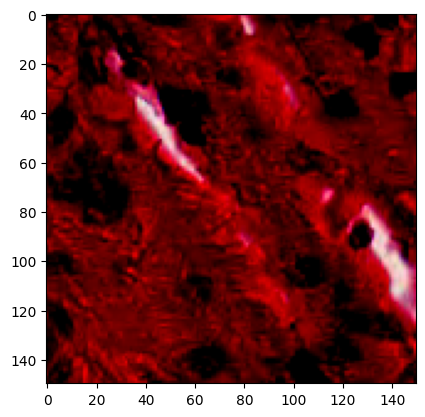

In [9]:
plt.imshow(data[0]*255) # * 255 because of previous normalization

In [10]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
# labels = to_categorical(labels)
print(labels[0], labels[0][0], type(labels[0]))

[0 1 0 0 0 0 0 0] 0 <class 'numpy.ndarray'>


In [11]:
print(type(labels[0]))

<class 'numpy.ndarray'>


In [12]:
# Split into train, val, test set
x, x_test, y, y_test = train_test_split(data, labels, test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25,train_size =0.75)

In [13]:
print('1- Training set:', x_train.shape, y_train.shape)
print('2- Validation set:', x_val.shape, y_val.shape)
print('3- Testing set:', x_test.shape, y_test.shape)

1- Training set: (3000, 150, 150, 3) (3000, 8)
2- Validation set: (1000, 150, 150, 3) (1000, 8)
3- Testing set: (1000, 150, 150, 3) (1000, 8)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
tf.keras.backend.clear_session()

In [46]:
IMG_SHAPE = 150

In [58]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
EPOCHS = 100
EPOCHS_2 = 200
BS = 256
STEPS = 3000/256

In [51]:
history=model.fit(x_train,
                y_train,
                batch_size=BS,
                #steps_per_epoch=STEPS,
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                )
                #validation_steps=STEPS)

Epoch 1/100
12/12 [==============================] - 26s 2s/step - loss: 1.9047 - accuracy: 0.2310 - val_loss: 1.5005 - val_accuracy: 0.3340
Epoch 2/100
12/12 [==============================] - 22s 2s/step - loss: 1.3873 - accuracy: 0.3797 - val_loss: 1.3861 - val_accuracy: 0.3390
Epoch 3/100
12/12 [==============================] - 21s 2s/step - loss: 1.2898 - accuracy: 0.4107 - val_loss: 1.1891 - val_accuracy: 0.5010
Epoch 4/100
12/12 [==============================] - 25s 2s/step - loss: 1.2048 - accuracy: 0.4640 - val_loss: 1.1178 - val_accuracy: 0.5480
Epoch 5/100
12/12 [==============================] - 22s 2s/step - loss: 1.1531 - accuracy: 0.4653 - val_loss: 1.0793 - val_accuracy: 0.5340
Epoch 6/100
12/12 [==============================] - 21s 2s/step - loss: 1.0936 - accuracy: 0.5067 - val_loss: 1.0252 - val_accuracy: 0.5260
Epoch 7/100
12/12 [==============================] - 22s 2s/step - loss: 1.0312 - accuracy: 0.5247 - val_loss: 1.0693 - val_accuracy: 0.4950
Epoch 8/100
1

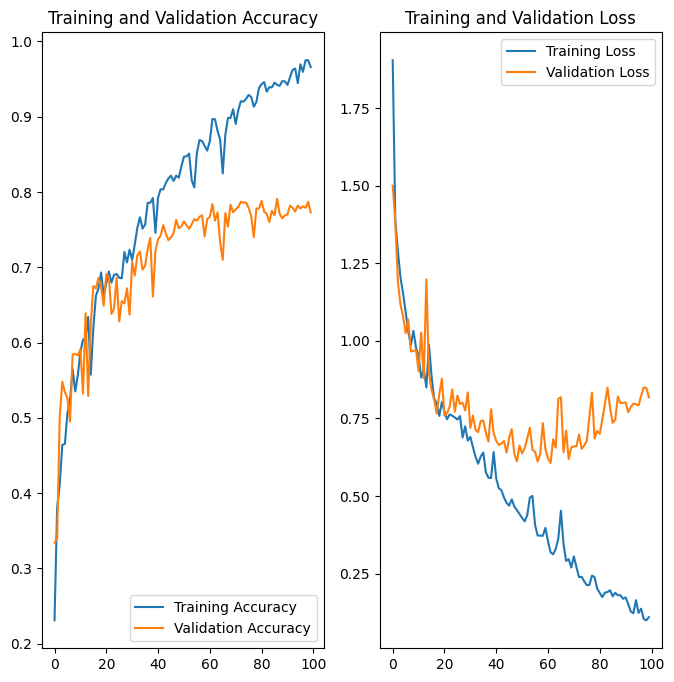

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
aug = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.3,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    )

In [74]:
tf.keras.backend.clear_session()

In [75]:
history2=model.fit(aug.flow(x_train,
                y_train,
                batch_size=BS),
                #steps_per_epoch=STEPS,
                epochs=EPOCHS_2,
                validation_data=(x_val, y_val),
                )
                #validation_steps=STEPS)

Epoch 1/200
12/12 [==============================] - 32s 2s/step - loss: 0.5913 - accuracy: 0.7730 - val_loss: 0.5413 - val_accuracy: 0.8150
Epoch 2/200
12/12 [==============================] - 28s 2s/step - loss: 0.5357 - accuracy: 0.7967 - val_loss: 0.5281 - val_accuracy: 0.7930
Epoch 3/200
12/12 [==============================] - 29s 2s/step - loss: 0.5500 - accuracy: 0.7860 - val_loss: 0.5070 - val_accuracy: 0.8080
Epoch 4/200
12/12 [==============================] - 33s 3s/step - loss: 0.5583 - accuracy: 0.7917 - val_loss: 0.5163 - val_accuracy: 0.7980
Epoch 5/200
12/12 [==============================] - 27s 2s/step - loss: 0.5388 - accuracy: 0.7990 - val_loss: 0.5040 - val_accuracy: 0.8090
Epoch 6/200
12/12 [==============================] - 26s 2s/step - loss: 0.5266 - accuracy: 0.8060 - val_loss: 0.5249 - val_accuracy: 0.7950
Epoch 7/200
12/12 [==============================] - 28s 2s/step - loss: 0.5466 - accuracy: 0.7903 - val_loss: 0.5124 - val_accuracy: 0.8060
Epoch 8/200
1

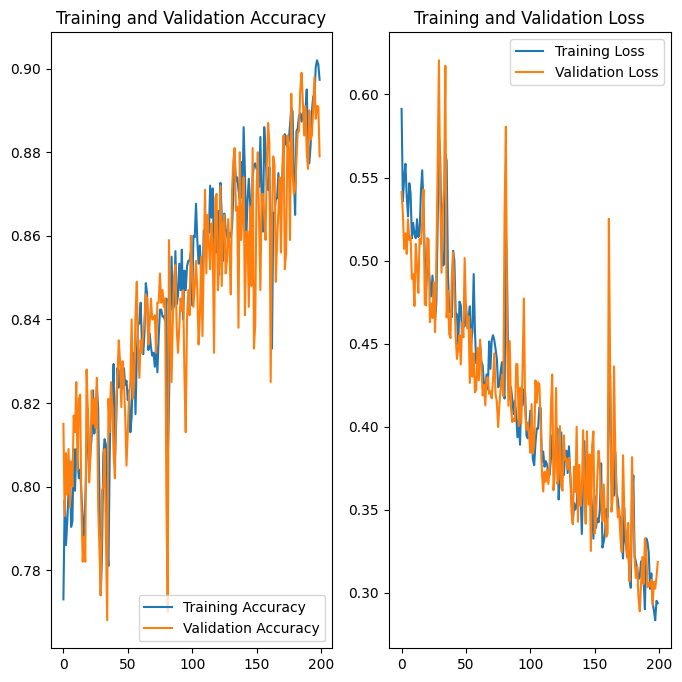

In [78]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(EPOCHS_2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
predIdxs = model.predict(x_test, batch_size=BS, verbose=0)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(np.argmax(y_test, axis=1), predIdxs, # labels transformed back to single unit
    target_names=lb.classes_))
model.save("model_cnn_philipp_v2", save_format="h5")

              precision    recall  f1-score   support

           1       0.86      0.95      0.90       140
           2       0.75      0.80      0.77       111
           3       0.73      0.86      0.79       130
           4       0.97      0.81      0.88       137
           5       0.88      0.81      0.84       131
           6       0.95      0.86      0.90       123
           7       0.95      0.93      0.94       113
           8       0.95      0.97      0.96       115

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



In [82]:
import cv2

# Load the colored image
img = cv2.imread('/Users/philippgamperli/PycharmProjects/real_computer_vision/data/Kather_texture_2016_image_tiles_5000/01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [83]:
# Invert the grayscale image
neg = cv2.bitwise_not(gray)

In [84]:
# Apply threshold to obtain binary image
_, thresh = cv2.threshold(neg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [88]:
# Apply morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [89]:
# Extract cancerous region from colored image
result = cv2.bitwise_and(img, img, mask=closed)

In [90]:
cv2.imshow('Result', result)

In [91]:
cv2.destroyAllWindows()